 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [30]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [31]:
# Reading whale returns
# YOUR CODE HERE
whale_returns_csv = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [32]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [33]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [34]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE

# Cleaning identified numeric fields with $ symbol
# csv_data['order_total'] = csv_data['order_total'].str.replace('$', '')
# csv_data['order_total']

sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']

# Converting `order_total` from `object` to `float`
# csv_data['order_total'] = csv_data['order_total'].astype('float')

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [11]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
# YOUR CODE HERE
sp500_history_df = sp500_history_df.dropna()
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [35]:
# Rename Column
# YOUR CODE HERE
# Rewrite the column names
column = ["S&P 500"]
sp500_history_df.columns = column
sp500_history_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [36]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

# Concatenate the two DataFrames by rows and perform an inner join
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis=1, join ="inner")
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

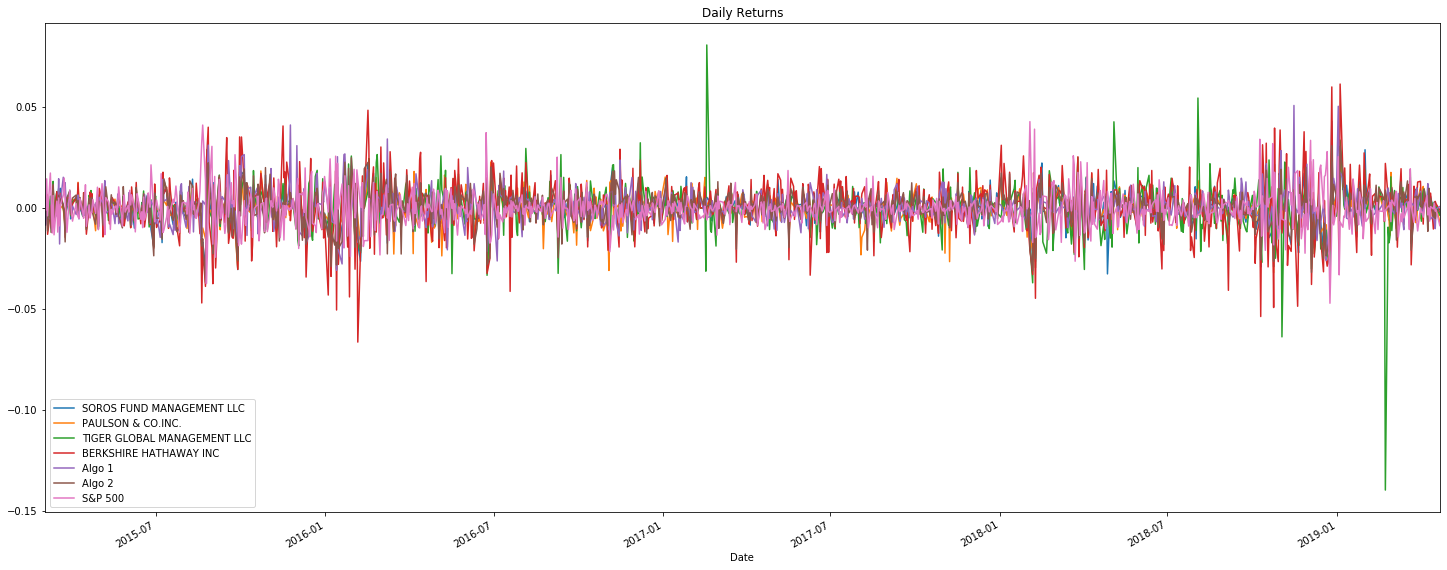

In [37]:
# Plot daily returns
# YOUR CODE HERE

combined_df.plot(subplots = False, figsize = (25,10), title= 'Daily Returns')

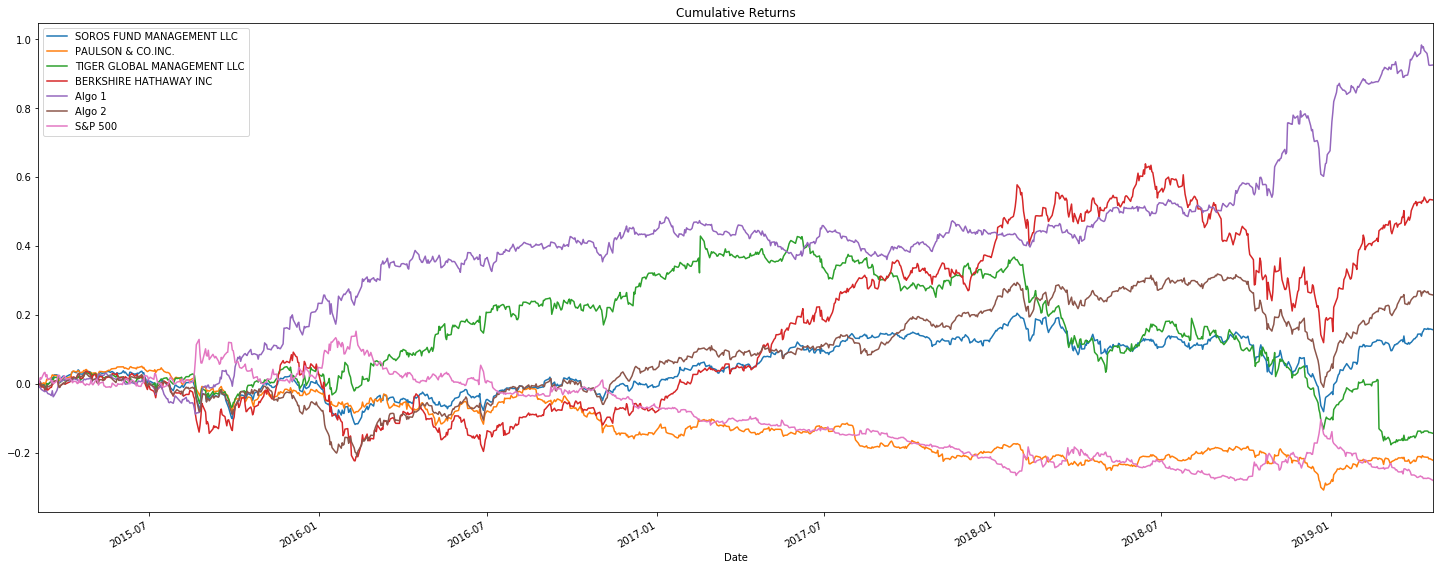

In [41]:
# Plot cumulative returns
# YOUR CODE HERE

cumulative_returns = (1 + combined_df).cumprod() -1
cumulative_returns.plot(subplots = False, figsize = (25,10), title= 'Cumulative Returns')

In [42]:
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123
...,...,...,...,...,...,...,...
2019-04-15,0.157839,-0.213494,-0.137203,0.525584,0.958591,0.264103,-0.274944
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,-0.273292
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,-0.274438


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

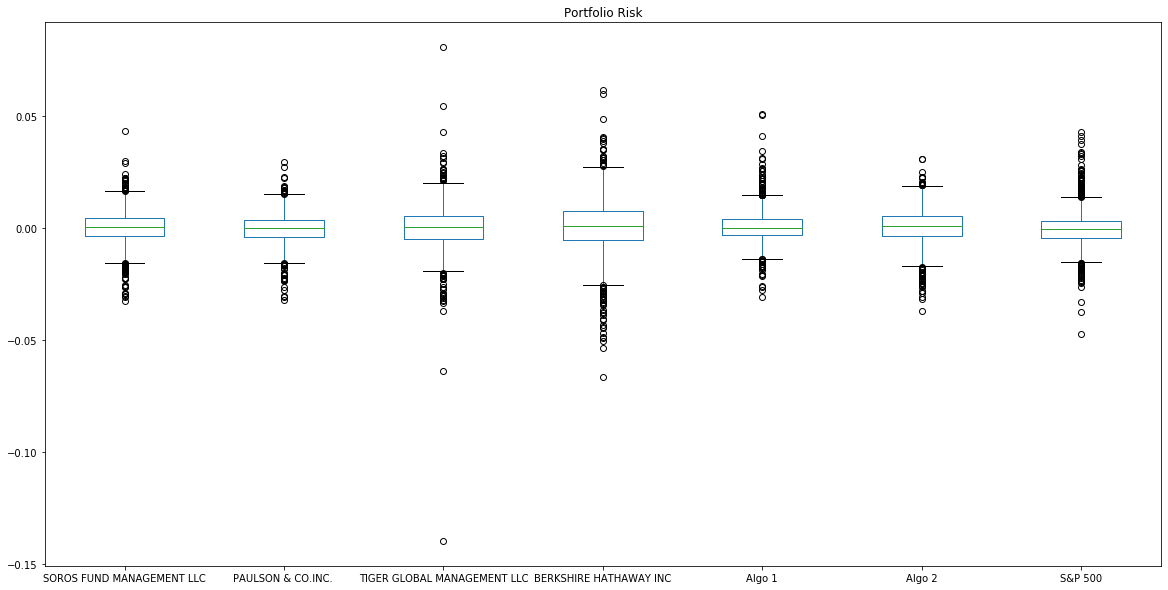

In [40]:
# Box plot to visually show risk
# YOUR CODE HERE

combined_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [48]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

# Calculate std dev
# all_portfolio_std = all_returns.std()
# all_portfolio_std.head()

combined_std = combined_df.std()
whale_returns_std = whale_returns_df.std()
algo_returns_std = algo_returns_df.std()
sp500_history_std = sp500_history_df.std()

combined_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [50]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_std_sort = combined_std.sort_values(ascending=False)
combined_std_sort.head(10)

# After sorting by standard deviation across the portfolios, we see that Berkshare Hathaway and Tiger Global are riskier than the S&P 500.

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [51]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

combined_std_annual = combined_std * np.sqrt(252)
combined_std_annual.head(10)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

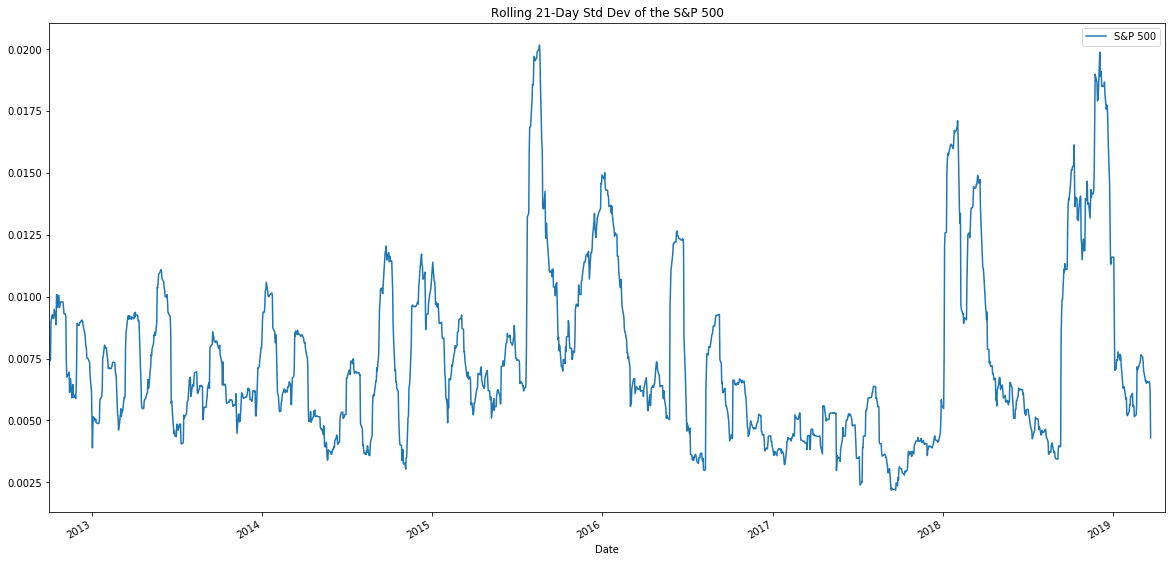

In [61]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

# rolling_std_sp500 = daily_returns['S&P 500'].rolling(window=21)
rolling_std_sp500 = sp500_history_df.rolling(window=21).std()
rolling_std_sp500_chart = rolling_std_sp500.plot(figsize=(20,10), title="Rolling 21-Day Std Dev of the S&P 500")

In [62]:
# Correlation
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [69]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

# Calculate covariance of all daily returns of AMZN vs. S&P 500
# covariance = daily_returns['AMZN'].cov(daily_returns['S&P 500'])
# covariance

# Calculate variance of all daily returns of AMZN vs. S&P 500
# variance = daily_returns['S&P 500'].var()
# variance

# Calculate beta of all daily returns of AMZN
# amzn_beta = covariance / variance
# amzn_beta

covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P 500'])
covariance_soros

3.889726983063765e-08

In [70]:
variance_soros = combined_df['S&P 500'].var()
variance_soros

7.373467552840441e-05

In [71]:
soros_beta = covariance_soros / variance_soros
soros_beta

0.0005275302230855206

In [72]:
covariance_berk = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])
covariance_berk

-1.5371091324717573e-06

In [73]:
variance = combined_df['S&P 500'].var()
variance

7.373467552840441e-05

In [74]:
berk_beta = covariance_berk / variance
berk_beta

-0.020846489408902668

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [79]:
# (OPTIONAL) YOUR CODE HERE
# combined_df.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, freq=None, adjust=True, ignore_na=False, axis=0)

combined_df.ewm(span=2,min_periods=21,adjust=False).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-15,0.000767,-0.001144,0.001185,-0.005290,-0.003979,-0.002011,-0.000701
2019-04-16,0.002055,-0.000123,-0.000159,-0.001206,-0.005956,0.001263,0.001286
2019-04-17,-0.001246,-0.004352,-0.002993,0.001746,-0.008853,-0.003065,-0.000623


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [80]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

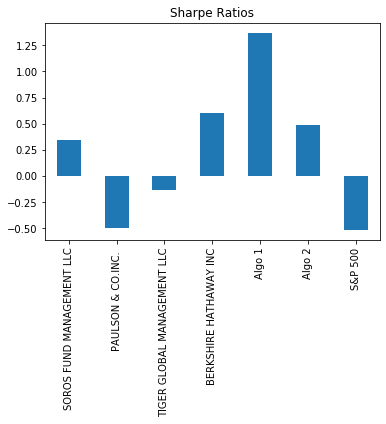

In [81]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [115]:
# Read the first stock
# YOUR CODE HERE

cost_data = Path("cost_historical.csv")
cost = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [116]:
# Read the second stock
# YOUR CODE HERE

goog_data = Path("goog_historical.csv")
goog = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [117]:
# Read the third stock
# YOUR CODE HERE

aapl_data = Path("aapl_historical.csv")
aapl = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [131]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

# Create a new pivot table where the columns are the closing prices for each ticker
portfolio_df = pd.concat([cost, goog, aapl], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
# portfolio_df.sort_index(inplace=False)

# Display a few rows
portfolio_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,GOOG,1162.38,AAPL,200.72
2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90
2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75


In [132]:
portfolio_df.drop(columns=['Symbol'], inplace=True)
portfolio_df.columns=['COST','GOOG','AAPL']
portfolio_df.head()

,COST,GOOG,AAPL
Trade DATE,,,
2019-05-09,243.47,1162.38,200.72
2019-05-08,241.34,1166.27,202.90
2019-05-07,240.18,1174.10,202.86
2019-05-06,244.23,1189.39,208.48
2019-05-03,244.62,1185.40,211.75


In [133]:
# Reset the index
# YOUR CODE HERE
portfolio_df = portfolio_df.reset_index()
portfolio_df

,Trade DATE,COST,GOOG,AAPL
0,2019-05-09,243.47,1162.38,200.72
1,2019-05-08,241.34,1166.27,202.90
2,2019-05-07,240.18,1174.10,202.86
3,2019-05-06,244.23,1189.39,208.48
4,2019-05-03,244.62,1185.40,211.75
...,...,...,...,...
245,2018-05-17,199.60,1078.59,186.99
246,2018-05-16,198.71,1081.77,188.18
247,2018-05-15,195.48,1079.23,186.44
248,2018-05-14,195.88,1100.20,188.15


In [134]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

portfolio_df = portfolio_df.pivot_table(index="Trade DATE")
portfolio_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [135]:
# Drop Nulls
# YOUR CODE HERE

portfolio_df = portfolio_df.dropna()
portfolio_df.isnull().sum()


AAPL    0
COST    0
GOOG    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [136]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

daily_returns = portfolio_df.pct_change()
daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [137]:
weights = [0.33, 0.33, 0.33]
weighted_returns = daily_returns.dot(weights)
weighted_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.009963
2018-05-16    0.009309
2018-05-17   -0.001579
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [141]:
# YOUR CODE HERE

master_df = pd.concat([combined_df, daily_returns], axis="columns", join ="inner")
master_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,NaN,NaN,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.006324,0.004479,-0.002940


In [142]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
master_df = master_df.dropna()
master_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
AAPL                           0
COST                           0
GOOG                           0
dtype: int64

In [143]:
master_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.006324,0.004479,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.003637,-0.003206,-0.011339


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

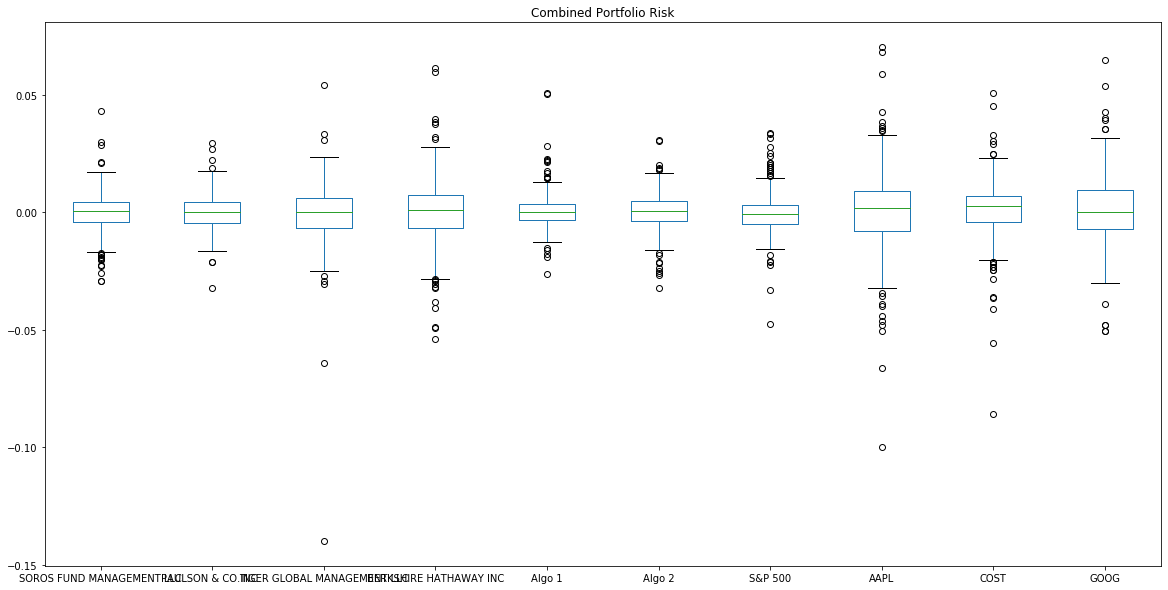

In [144]:
# Risk
# YOUR CODE HERE

master_df.plot.box(figsize=(20,10), title="Combined Portfolio Risk")

In [146]:
master_std = master_df.std()
master_std

SOROS FUND MANAGEMENT LLC      0.009248
PAULSON & CO.INC.              0.007366
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
Algo 1                         0.008437
Algo 2                         0.008788
S&P 500                        0.009605
AAPL                           0.018724
COST                           0.013376
GOOG                           0.016111
dtype: float64

In [147]:
master_std_sort = master_std.sort_values(ascending=False)
master_std_sort.head(15)

AAPL                           0.018724
GOOG                           0.016111
BERKSHIRE HATHAWAY INC         0.015579
TIGER GLOBAL MANAGEMENT LLC    0.014671
COST                           0.013376
S&P 500                        0.009605
SOROS FUND MANAGEMENT LLC      0.009248
Algo 2                         0.008788
Algo 1                         0.008437
PAULSON & CO.INC.              0.007366
dtype: float64

In [148]:
master_std_annual = master_std * np.sqrt(252)
master_std_annual.head(15)

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
AAPL                           0.297235
COST                           0.212330
GOOG                           0.255747
dtype: float64

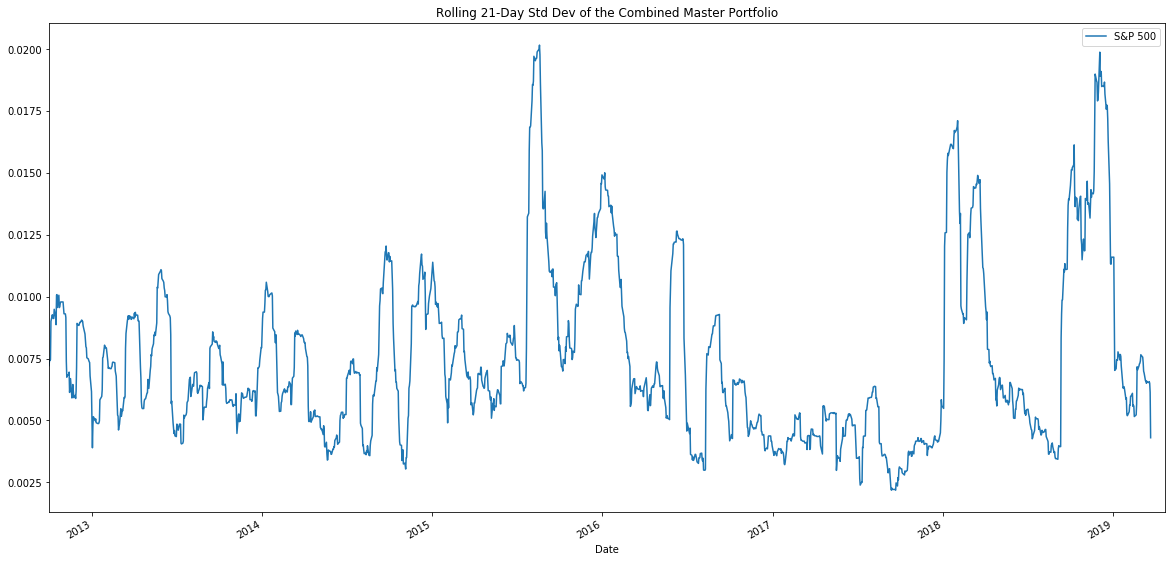

In [149]:
# Rolling
# YOUR CODE HERE

master_std_roll = master_df.rolling(window=21).std()
master_std_roll = rolling_std_sp500.plot(figsize=(20,10), title="Rolling 21-Day Std Dev of the Combined Master Portfolio")

In [156]:
# Beta
# YOUR CODE HERE


In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [151]:
# YOUR CODE HERE
master_corr = master_df.corr()
master_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.608203,0.517303,0.682174
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.544385,0.496253,0.553574
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.333839,0.352421,0.289959
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.693263,0.430821,0.823946
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.223292,0.138534,0.271730
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.638438,0.495357,0.681320
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.090390,-0.069904,-0.033106
AAPL,0.608203,0.544385,0.333839,0.693263,0.223292,0.638438,0.090390,1.000000,0.432894,0.691782
COST,0.517303,0.496253,0.352421,0.430821,0.138534,0.495357,-0.069904,0.432894,1.000000,0.409008
GOOG,0.682174,0.553574,0.289959,0.823946,0.271730,0.681320,-0.033106,0.691782,0.409008,1.000000
